<a href="https://colab.research.google.com/github/Constanza234/EDP-1/blob/main/Nicholson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Cranck Nicholson


Resolveremos el problema:

$$ \frac{\partial u}{\partial t}(x,t) - \alpha ^2 \frac{\partial^2 u}{\partial x^2}(x,t) = 0 \\[2ex] $$


Sujeto a

$$\alpha = 1 \hspace1cm 0<x<1 , \hspace1cm 0<t \\[1ex]$$
$$ u(0,t)=u(1,t)=0 , \hspace1cm u(x,0)=1-4 \left(x-\frac{1}{2}\right)^2 , \hspace1cm 0\leq x \leq 1 \\[1ex]$$

Nos representa el calor a lo largo de una barra, conforme va pasando el tiempo en una dimensión, considerando los extremos de la barra con ausencia de calor.

Utilizaremos la siguiente expresión:
$$ r=\frac{\alpha^2 k}{h^2} $$


In [68]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from tabulate import tabulate  #tabla del ejercicio 1

import math #solución exacta


In [69]:
alpha = 1.0  #datos dependiendo tu problema
h = 1/10
k = 0.01
r = alpha**2 * k / h**2

#puntos internos
x = np.arange(0, 1 + h, h)  # 0, 0.1, ..., 1.0
x_in = x[1:-1]
n = len(x_in)   #dimensiones de la matriz

# Condiciones de frontera
def u_izq(t):
    return 0.0

def u_der(t):
    return 0.0

# Condición inicial: u(x,0) = 1 - 4(x-1/2)^2
def u0_func(x):
    return 1 - 4*(x - 0.5)**2

f = u0_func(x_in)


In [70]:
#definimos como función el método de Nicholson, creamos matrices vacias para guardar los resultados
def matrices_crank_nicolson(n, r):
    A = sp.zeros(n, n)
    B = sp.zeros(n, n)

    for i in range(n): # diagonal principal
        A[i, i] = 1 + r
        B[i, i] = 1 - r

        if i > 0: # subdiagonal inferior
            A[i, i-1] = -r/2
            B[i, i-1] =  r/2

        if i < n-1: # subdiagonl superior
            A[i, i+1] = -r/2
            B[i, i+1] =  r/2

    return A, B

AC, BC = matrices_crank_nicolson(n, r) # matrices de crank nicholson




In [71]:
AC

Matrix([
[ 2.0, -0.5,    0,    0,    0,    0,    0,    0,    0],
[-0.5,  2.0, -0.5,    0,    0,    0,    0,    0,    0],
[   0, -0.5,  2.0, -0.5,    0,    0,    0,    0,    0],
[   0,    0, -0.5,  2.0, -0.5,    0,    0,    0,    0],
[   0,    0,    0, -0.5,  2.0, -0.5,    0,    0,    0],
[   0,    0,    0,    0, -0.5,  2.0, -0.5,    0,    0],
[   0,    0,    0,    0,    0, -0.5,  2.0, -0.5,    0],
[   0,    0,    0,    0,    0,    0, -0.5,  2.0, -0.5],
[   0,    0,    0,    0,    0,    0,    0, -0.5,  2.0]])

In [72]:
BC

Matrix([
[2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0,                    0,                    0,                    0],
[                 0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0,                    0,                    0],
[                   0,                  0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0,                    0],
[                   0,                    0,                  0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0],
[                   0,                    0,                    0,                  0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,               

In [73]:
def crank_nicolson(A, B, f, m):

    S = []
    u = sp.Matrix(f)   # vector b

    for j in range(m+1):
        #guardamos la solución actual
        S.append(np.array(u, dtype=float).reshape(-1))

        #construimos lado derecho y resolvemos para el siguiente paso
        b = B * u
        u = A.LUsolve(b)

    return np.array(S)

# tiempo máximo, número de pasos
t_max = 0.10
m = int(t_max / k)

U = crank_nicolson(AC, BC, f, m)   # U tiene tamaño m+1 y n



# EJERCICIO 1

In [74]:
t_vals = np.arange(0, t_max + k/2, k)   # 0, 0.01, ..., 0.10

xs = 5

tabla = []
for j, t in enumerate(t_vals):
    fila = [t]        # tiempo
    fila.append(0.0)  # x = 0

    for i in range(xs):
        fila.append(U[j, i])
    tabla.append(fila)

encabezados = ["t", "x = 0.0", "0.1", "0.2", "0.3", "0.4", "0.5"]

print(tabulate(tabla, headers=encabezados,
               tablefmt="github", floatfmt=".4f"))


|      t |   x = 0.0 |    0.1 |    0.2 |    0.3 |    0.4 |    0.5 |
|--------|-----------|--------|--------|--------|--------|--------|
| 0.0000 |    0.0000 | 0.3600 | 0.6400 | 0.8400 | 0.9600 | 1.0000 |
| 0.0100 |    0.0000 | 0.3014 | 0.5657 | 0.7615 | 0.8804 | 0.9202 |
| 0.0200 |    0.0000 | 0.2676 | 0.5048 | 0.6885 | 0.8030 | 0.8417 |
| 0.0300 |    0.0000 | 0.2399 | 0.4548 | 0.6231 | 0.7300 | 0.7665 |
| 0.0400 |    0.0000 | 0.2164 | 0.4110 | 0.5646 | 0.6626 | 0.6963 |
| 0.0500 |    0.0000 | 0.1958 | 0.3721 | 0.5117 | 0.6011 | 0.6319 |
| 0.0600 |    0.0000 | 0.1773 | 0.3372 | 0.4639 | 0.5452 | 0.5731 |
| 0.0700 |    0.0000 | 0.1607 | 0.3056 | 0.4206 | 0.4943 | 0.5197 |
| 0.0800 |    0.0000 | 0.1457 | 0.2771 | 0.3813 | 0.4482 | 0.4713 |
| 0.0900 |    0.0000 | 0.1321 | 0.2512 | 0.3457 | 0.4064 | 0.4273 |
| 0.1000 |    0.0000 | 0.1197 | 0.2277 | 0.3135 | 0.3685 | 0.3875 |


# EJERCICIO 2

Para poder comparar las soluciones, calculamos la solución exacta y la visualizamos en la gráfica junto con la solución numérica.

In [75]:
#solución exacta de la ecuación

def u_ex(x, t, N=201):

    s = 0.0
    for k in range(N):
        n = 2*k + 1
        b_n = 32.0 / (math.pi**3 * n**3)
        s += b_n * math.exp(-(n*math.pi)**2 * t) * math.sin(n*math.pi * x)
    return s


In [76]:
# construimos matriz de la solución exacta en los mismos puntos
U_ex = np.zeros_like(U)

for j, t in enumerate(t_vals):
    for i, xi in enumerate(x_in):
        U_ex[j, i] = u_ex(xi, t)

# error absoluto de la gráfica
error = np.abs(U - U_ex)
error_max = np.max(error)


# comparación para un determinado t
t_obj = 0.10
j_obj = int(round(t_obj / k))


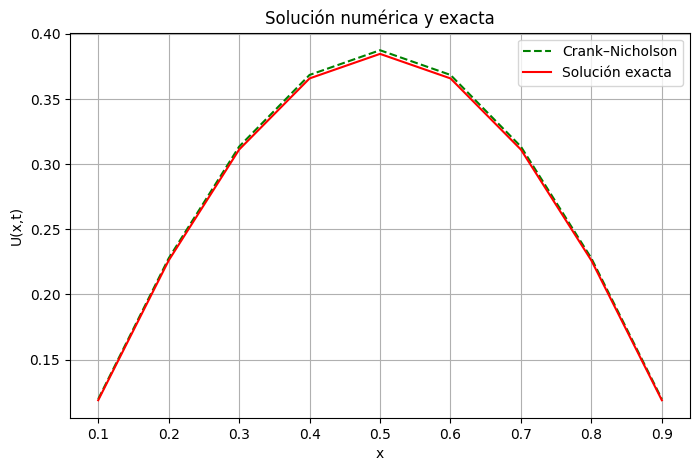

In [77]:
#Gráfica donde vizualizamos ambas soluciones obtenidas

plt.figure(figsize=(8,5))
plt.plot(x_in, U[j_obj, :], '--', color='green' ,label='Crank–Nicholson')
plt.plot(x_in, U_ex[j_obj, :], color='red' ,label='Solución exacta')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title('Solución numérica y exacta')
plt.grid(True)
plt.legend()
plt.show()

